In [1]:
import nltk
import pandas as pd

In [2]:
#Importing Data

messages = [line.rstrip() for line in open('C:/Users/Akshay/Desktop/Udemy/NLP/SMSSpamCollection')]

In [3]:
len(messages)

5574

In [4]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
messages = pd.read_csv('C:/Users/Akshay/Desktop/Udemy/NLP/SMSSpamCollection', sep = '\t', names = ['label','message'])

In [8]:
len(messages)

5572

In [ ]:
#Exploratory Data Analysis:

In [63]:
messages.describe

<bound method NDFrame.describe of      label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
5     spam  FreeMsg Hey there darling it's been 3 week's n...     147
6      ham  Even my brother is not like to speak with me. ...      77
7      ham  As per your request 'Melle Melle (Oru Minnamin...     160
8     spam  WINNER!! As a valued network customer you have...     157
9     spam  Had your mobile 11 months or more? U R entitle...     154
10     ham  I'm gonna be home soon and i don't want to tal...     109
11    spam  SIX chances to win CASH! From 100 to 20,000 po...     136
12    spam  URGENT! You have won a 1 week FREE membershi

In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

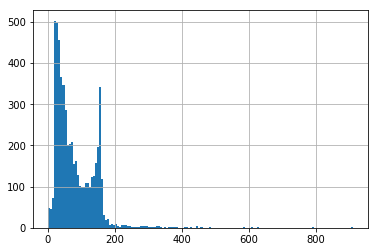

In [13]:
messages['length'].hist(bins = 150)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']==910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF69B62B00>,
      dtype=object)

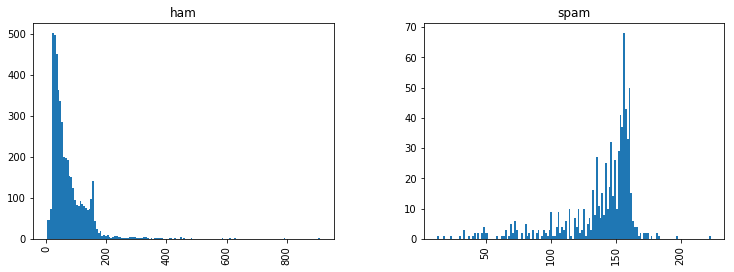

In [16]:
messages.hist('length', by = 'label', bins = 150, figsize=(12,4))

In [17]:
# Text Pre-processing

import string

In [18]:
string.punctuation   #Contains all punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from nltk.corpus import stopwords

In [20]:
#stopwords.words('english')

In [21]:
#Sample text mining:
mess = 'Sample message! Notice: It has punctuation.'   #Sample message

In [22]:
#STEP 1: Remove punctuation and get a dictionary of characters:
no_punct  = [char for char in mess if char not in string.punctuation]   #Removes punctuations from above sample message
no_punct

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [23]:
#STEP 2: Combine the characters to form words again (without punctuation):

no_punct = ''.join(no_punct)
no_punct

'Sample message Notice It has punctuation'

In [24]:
#STEP 3: Split the words:

no_punct.split()

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [25]:
#STEP 4: Clean the stopwords:

clean_mess = [word for word in no_punct.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [26]:
#Using the above 4 steps, we will create a function:

def text_process(mess):
    """
    STEP 1: Remove punctuation and get a dictionary of characters
    STEP 2: Combine the characters to form words again (without punctuation)
    STEP 3: Split the words
    STEP 4: Clean the stopwords
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [27]:
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [28]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [29]:
# Vectorization

from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [31]:
print(len(bow_transformer.vocabulary_))

11425


In [32]:
mess4 = messages['message'][3]

In [33]:
mess4

'U dun say so early hor... U c already then say...'

In [34]:
bow4 = bow_transformer.transform([mess4])

In [35]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
bow_transformer.get_feature_names()[4068]  

'U'

In [37]:
bow_transformer.get_feature_names()[9554]

'say'

In [38]:
messages_bow = bow_transformer.transform(messages['message'])

In [42]:
print('Shape of sparse matrix:', messages_bow.shape)

Shape of sparse matrix: (5572, 11425)


In [41]:
messages_bow.nnz    #Number of Non zero values

50548

In [44]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [45]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [46]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [47]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [48]:
# Training a model

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [49]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [50]:
# Model Evaluation

all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [51]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [52]:
# Train Test Split

from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [53]:
# Creating a Data Pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [54]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001AF64205F28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [57]:
predictions = pipeline.predict(msg_test)

In [67]:
# RESULTS:
from sklearn import metrics
print(metrics.classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1022
       spam       0.70      1.00      0.83        93

avg / total       0.98      0.97      0.97      1115



In [69]:
print(metrics.accuracy_score(predictions,label_test))

0.9650224215246637
